# Data analysis and preprocessing

In [1]:
import gc
import re
import data_preprocessing as dpp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auxiliar_functions import extract_info
# global
data_path = '../Data/'

## Lost values

In [2]:
# load and merge data
# important: del and gc calls for performance and memory issues.
df_train = pd.read_csv(data_path + 'train.csv', dtype={'target': np.uint8})
df_members = pd.read_csv(data_path + 'members.csv')
df_merged = df_train.merge(df_members, on='msno', how='left')
del df_train, df_members
gc.collect()
df_songs = pd.read_csv(data_path + 'songs.csv')
df_merged = df_merged.merge(df_songs, on='song_id', how='left')
del df_songs
gc.collect()
df_song_extra = pd.read_csv(data_path + 'song_extra_info.csv')
df_merged = df_merged.merge(df_song_extra, on='song_id', how='left')
del df_song_extra
gc.collect()
df_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [3]:
len(df_merged) # number of rows

7377418

In [4]:
len(df_merged.columns)

20

In [5]:
merged_info = extract_info(df_merged) # nulls, percentage of nulls, data types
merged_info

,null_count,null_percentage,dtypes
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8
city,0,0.000000,int64
bd,0,0.000000,int64
gender,2961479,40.142486,object
registered_via,0,0.000000,int64


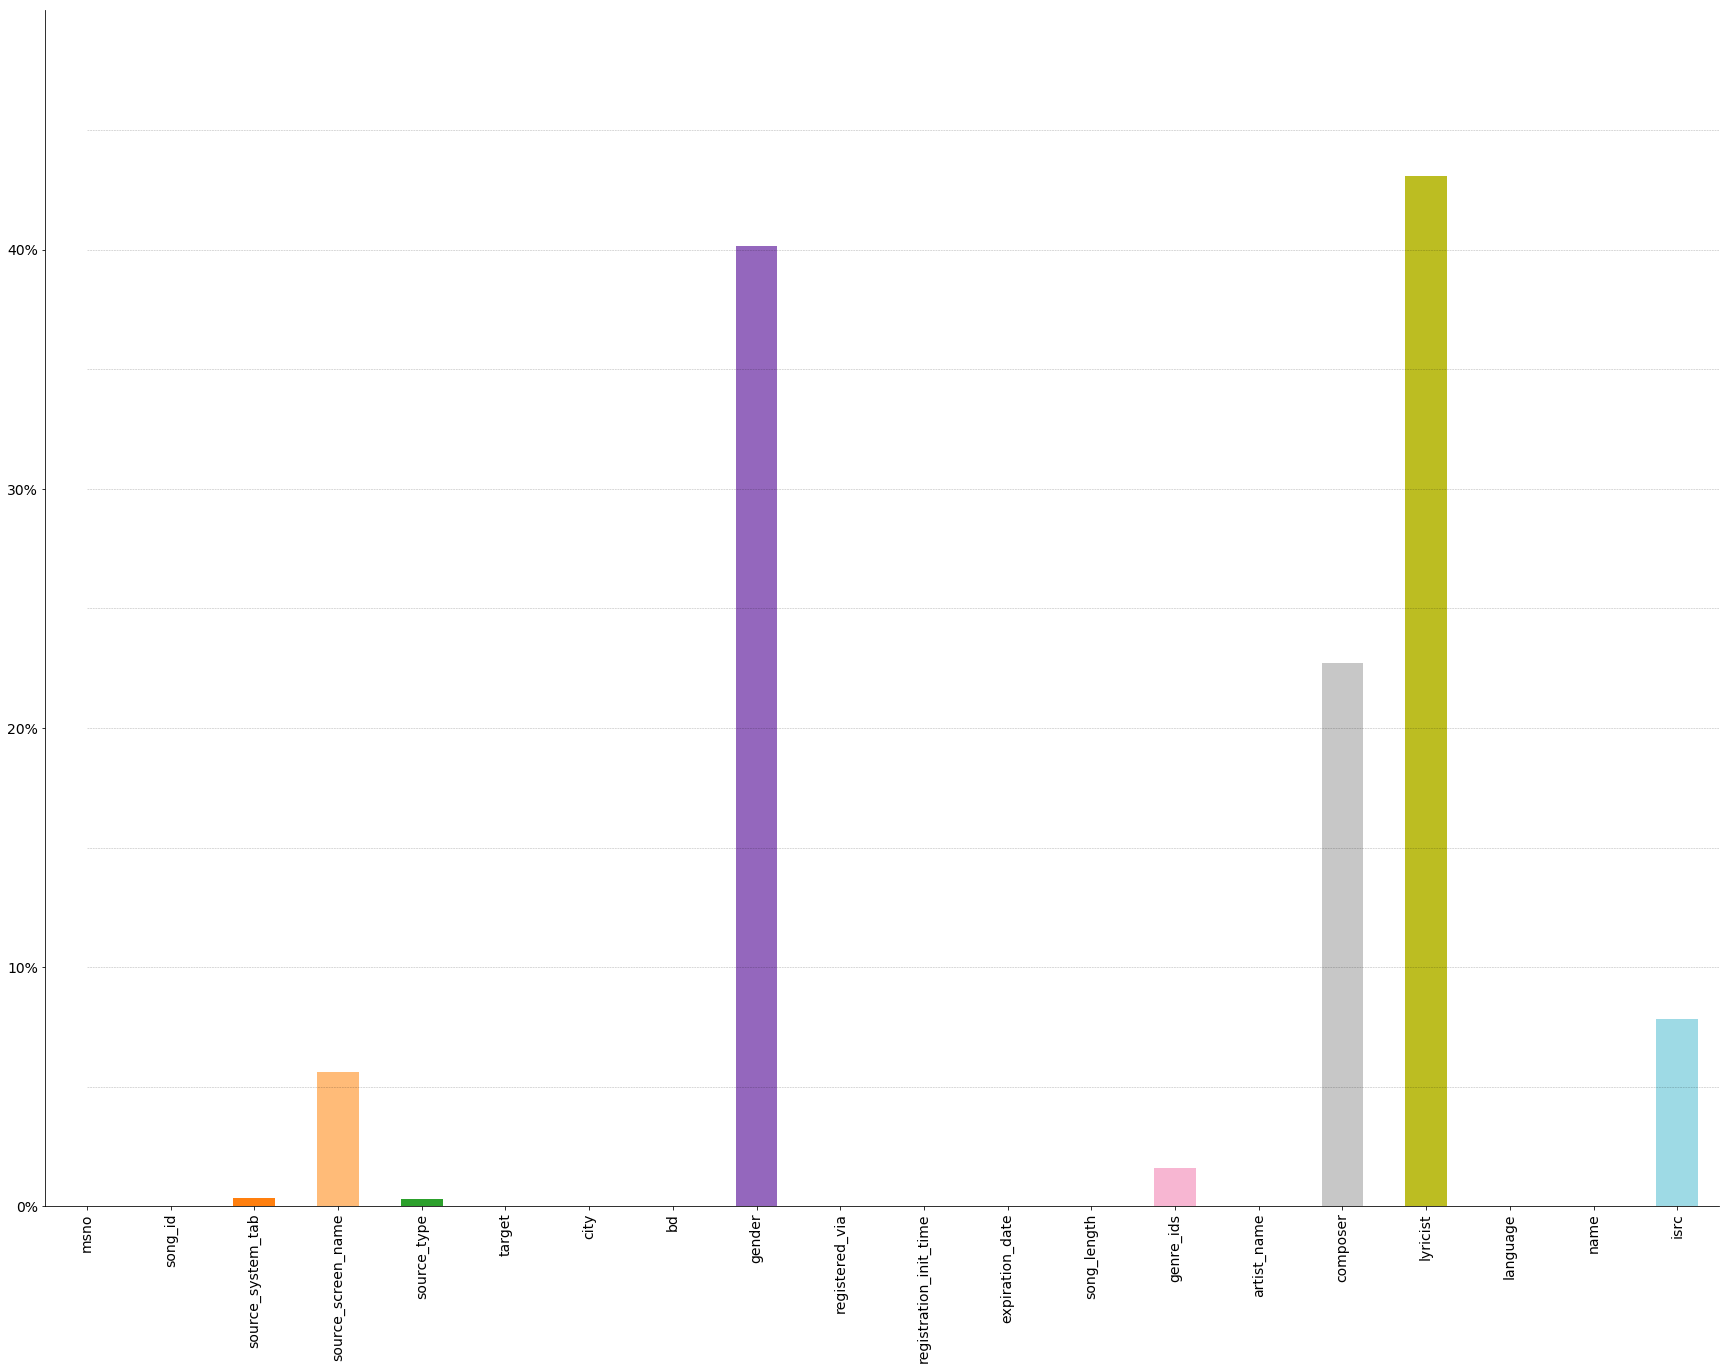

In [6]:
dpp.plot_lost_values_percent(merged_info['null_percentage'])

## Outliers: bd feature

In [6]:
df_merged['bd'] = df_merged['bd'].apply(dpp.bd_nanify_outlier)

In [7]:
extract_info(df_merged).loc['bd']

null_count         2966437
null_percentage    40.2097
dtypes             float64
Name: bd, dtype: object

### Get song_year from ISRC

In [8]:
df_merged['song_year'] = df_merged['isrc']
df_merged['song_year'] = df_merged['song_year'].apply(dpp.process_isrc)
df_merged['song_year'].head()

0    2016.0
1    1999.0
2    2006.0
3    2010.0
4    2016.0
Name: song_year, dtype: float64

In [9]:
merged_info = extract_info(df_merged)
merged_info

,null_count,null_percentage,dtypes
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8
city,0,0.000000,int64
bd,2966437,40.209691,float64
gender,2961479,40.142486,object
registered_via,0,0.000000,int64


## Feature analysis: composer and lyricist

Number of categories composers:

In [10]:
len(dpp.make_set_categories(df_merged['composer']))

81566

Number of categories lyricists:

In [11]:
len(dpp.make_set_categories(df_merged['lyricist']))

38473

## Remove features

In [12]:
rm_columns = ['msno', 'song_id', 'composer', 'lyricist', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'artist_name', 'name', 'isrc']
df_merged = df_merged.drop(columns=rm_columns)
df_merged.head()

,source_system_tab,source_screen_name,source_type,target,city,song_length,genre_ids,language,song_year
0,explore,Explore,online-playlist,1,1,206471.0,359,52.0,2016.0
1,my library,Local playlist more,local-playlist,1,13,284584.0,1259,52.0,1999.0
2,my library,Local playlist more,local-playlist,1,13,225396.0,1259,52.0,2006.0
3,my library,Local playlist more,local-playlist,1,13,255512.0,1019,-1.0,2010.0
4,explore,Explore,online-playlist,1,1,187802.0,1011,52.0,2016.0


In [13]:
merged_info = extract_info(df_merged)
merged_info

,null_count,null_percentage,dtypes
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8
city,0,0.000000,int64
song_length,114,0.001545,float64
genre_ids,118455,1.605643,object
language,150,0.002033,float64
song_year,577858,7.832795,float64


In [14]:
df_merged = df_merged.dropna()
merged_info = extract_info(df_merged)
merged_info

,null_count,null_percentage,dtypes
source_system_tab,0,0.0,object
source_screen_name,0,0.0,object
source_type,0,0.0,object
target,0,0.0,uint8
city,0,0.0,int64
song_length,0,0.0,float64
genre_ids,0,0.0,object
language,0,0.0,float64
song_year,0,0.0,float64


### Set unique genre_ids

In [ ]:
len(dpp.make_set_categories(df_merged['genre_ids']))

In [15]:
genres_dict = dpp.count_genres_freq(df_merged)
genres_dict

{'1000': 6,
 '1007': 52,
 '1011': 38141,
 '1019': 38,
 '102': 38,
 '1026': 19,
 '1033': 21,
 '1040': 198,
 '1047': 212,
 '1054': 77,
 '1068': 24,
 '1082': 507,
 '109': 30684,
 '1096': 69,
 '1103': 49,
 '1110': 29,
 '1117': 10,
 '1124': 2,
 '1131': 2,
 '1138': 630,
 '1145': 196,
 '1152': 11032,
 '1155': 281,
 '1162': 8,
 '1169': 20,
 '118': 1001,
 '1180': 5146,
 '1187': 4,
 '1194': 5,
 '1201': 6,
 '1208': 232,
 '125': 26491,
 '1259': 206960,
 '1266': 8,
 '1273': 130,
 '1280': 59,
 '1287': 4869,
 '139': 96742,
 '152': 2,
 '1568': 109,
 '1572': 5124,
 '1579': 1,
 '1598': 80,
 '1605': 895,
 '1609': 340690,
 '1616': 52832,
 '1630': 60,
 '1633': 311,
 '177': 54,
 '184': 58,
 '191': 68,
 '1944': 10,
 '1955': 2840,
 '1965': 13,
 '1969': 405,
 '1977': 77,
 '198': 25,
 '1981': 67,
 '1988': 48,
 '1995': 3628,
 '2008': 2,
 '2015': 4,
 '2022': 150358,
 '2029': 83,
 '2032': 516,
 '205': 23,
 '2052': 33,
 '2058': 1390,
 '2065': 16,
 '2072': 938,
 '2079': 933,
 '2086': 1093,
 '2093': 1026,
 '2100': 73

In [19]:
df_merged['genre_ids'] = df_merged['genre_ids'].apply(lambda x: dpp.get_max_genre(x, genres_dict))
df_merged.head()

,source_system_tab,source_screen_name,source_type,target,city,song_length,genre_ids,language,song_year
0,explore,Explore,online-playlist,1,1,206471.0,359,52.0,2016.0
1,my library,Local playlist more,local-playlist,1,13,284584.0,1259,52.0,1999.0
2,my library,Local playlist more,local-playlist,1,13,225396.0,1259,52.0,2006.0
3,my library,Local playlist more,local-playlist,1,13,255512.0,1019,-1.0,2010.0
4,explore,Explore,online-playlist,1,1,187802.0,1011,52.0,2016.0


In [20]:
merged_info = extract_info(df_merged)
merged_info

,null_count,null_percentage,dtypes
source_system_tab,0,0.0,object
source_screen_name,0,0.0,object
source_type,0,0.0,object
target,0,0.0,uint8
city,0,0.0,int64
song_length,0,0.0,float64
genre_ids,0,0.0,object
language,0,0.0,float64
song_year,0,0.0,float64


In [ ]:
len(dpp.make_set_categories(df_merged['genre_ids']))

148

## Write csv

In [17]:
df_merged.to_csv(data_path + 'df_clean.csv')

### Category analysis

In [7]:
len(dpp.make_set_categories(df_merged['source_system_tab']))

8

In [6]:
len(dpp.make_set_categories(df_merged['source_screen_name']))

20

In [14]:
len(dpp.make_set_categories(df_merged['city']))

21

In [15]:
len(dpp.make_set_categories(df_merged['language']))

10

In [6]:
len(dpp.make_set_categories(df_merged['genre_ids']))

166

In [8]:
len(dpp.make_set_categories(df_merged['msno'], split=False))

30755

In [9]:
len(dpp.make_set_categories(df_merged['song_id']))

359966

In [10]:
s = dpp.make_set_categories(df_merged['song_id'], split=False)
s

{'h5n3I7tVoRNSUNuoFxZILRi2vRumgp5Slac3Iw+acm0=',
 'lN5Y3s7WsxuetiRnT0YyywtYWlsTKwqgEgVGm5hLNT4=',
 '49BZLGF2mL/mz01WMGLN/HjgsfGbcXfYjkX8MJ9evWo=',
 'K9DqNvZyv56G8X06jvmd55nUrCoqpmrvuA1BVSx5N9s=',
 '2F7z9la/pKgzUI1dFCJQp7qhE0vK0uiR7zv/UpRHQdw=',
 'bdugHTRFEDK9juK6QqIbKvowmW1eqOusIMSyTejSO3Q=',
 'oaUed3rJhBB1twbnb2t1Kud8Gw2YD0+g//YtV2iqa5s=',
 '1hF+Mzna3ciftzTaxqicz6MAV66jS3L/9GTIJpAek6g=',
 'MHooMPAGM8Mjn1+zlWyVj5P1fjZG3RafjIVUtFM+Ijw=',
 'tkr/8RvyqcxlUkMZB2SsWsTeuMEjEfsPqWzDC3JePnw=',
 'ra94YMPxbKL4DZZhzlTcdeubvu86aphHKem2kB7q6No=',
 'k62jARy4KahO1j0jWjwCv/QHjwVB4CGHr0+z69GUTH0=',
 'sw1vpO6Knd6kC1TtDNbLyDo3H7xalg+I52sVtYrCJJs=',
 'DQ+PEv0DriYRwLJT6eVn3S1nbB12uBSUnkZ0r0mHjts=',
 'pU3FDBA46H2iNe4MkuGWaaBEaH6CByV0by0JTZEgDAs=',
 'WHZtQUI8j03YHcRFbfAW6yaFXIl8bhx8+PQcx+h12o0=',
 'jTrwcIIeRwY/xPApI4pZUP3OZAdfApc73DxPp0A6Aho=',
 '7JYRz0UmMXk7oRO349qvHPiyMAkXs39iY3JG3zrXT9w=',
 'mMJE97QdWSLdQHPIr9fgy0cMVmZjqW7jwjn7BoguSS8=',
 'vQKEwBwzGSgzp2nRvonoR9drlC3LiWwqcqNpOncwmus=',
 'ehMUFSdsg0BIcgzReX

In [11]:
len(s)

359966